# 📘 Introduction to Multilayer Perceptron (MLP) for AI Beginners

## Welcome to Your First AI Session!

Over the next 2 hours, we'll dive into the world of Artificial Neural Networks. Our focus will be on the **Multilayer Perceptron (MLP)**, a foundational model in deep learning.

An MLP is a type of neural network with at least three layers: an **input layer**, one or more **hidden layers**, and an **output layer**. What makes it powerful is its ability to learn complex, non-linear patterns in data, which is essential for real-world tasks like classifying images or understanding text.

### 🎯 Learning Objectives:
By the end of this session, you will understand:
1.  **Forward & Backward Passes**: The two-step dance of training a neural network.
2.  **Activation Functions**: The secret ingredient that allows networks to learn complex things.
3.  **Cross-Entropy Loss**: How we measure if our model's predictions are good or bad.
4.  **Backpropagation**: How the network learns from its mistakes automatically.
5.  **Common Challenges**: What are vanishing/exploding gradients?
6.  **Overfitting & Dropout**: How to stop our model from just memorizing the answers.

--- 
## Topic 1: Forward and Backward Passes

📄 **Explanation:**
Training a neural network is like teaching a student for a test. It involves two main steps that repeat over and over:

1.  **Forward Pass (The Test):** We give the network an input (a question) and let it 'propagate' through its layers to produce an output (an answer). We then compare its answer to the correct one and calculate a 'loss' score, which tells us how wrong the network was.

2.  **Backward Pass (The Review):** Based on the loss score, we go backward through the network and adjust its internal 'weights' and 'biases' slightly. This process, called **Backpropagation**, is like telling the student what they got wrong and how to fix it for the next question. The goal is to minimize the loss.

In [7]:
# 💻 Code Example: A Simple Forward Pass
# Let's simulate a single neuron's calculation from the input to the output.
import numpy as np

# A simple sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Input data
x = np.array([0.5, 0.8])

# Neuron's parameters (these are what the network learns!)
weights = np.array([0.2, -0.6])
bias = 0.1

# 1. Calculate the weighted sum + bias
z = np.dot(x, weights) + bias

# 2. Apply the activation function to get the output
output = sigmoid(z)

print(f"Input to the neuron (z): {z:.4f}")
print(f"Final output of the neuron: {output:.4f}")

# 🧪 Try changing the values in the 'x', 'weights', or 'bias' variables and see how the output changes!

Input to the neuron (z): -0.2800
Final output of the neuron: 0.4305


### 🧠 Practice Task 1

Given a new input `x = [1.0, 0.5]`, new `weights = [0.7, 0.3]`, and a `bias = -0.2`, calculate the output of the neuron. You can modify the code cell above to find the answer.

--- 
## Topic 2: Nonlinearity and Activation Functions

📄 **Explanation:**
Imagine trying to separate red dots from blue dots on a graph using only a single straight line. It's easy if they are on opposite sides, but what if the red dots are in a circle in the middle? A straight line won't work!

**Activation functions** are what allow neural networks to draw curvy, complex lines instead of just straight ones. They introduce 'non-linearity', which is the key to learning complex patterns.

Common Activation Functions:
- **Sigmoid:** Squishes any number into a range between 0 and 1. Good for binary (yes/no) predictions.
- **Tanh:** Squishes numbers into a range between -1 and 1.
- **ReLU (Rectified Linear Unit):** A simple but powerful function. If the input is positive, it keeps it. If it's negative, it becomes zero. This is the most popular choice for hidden layers today!

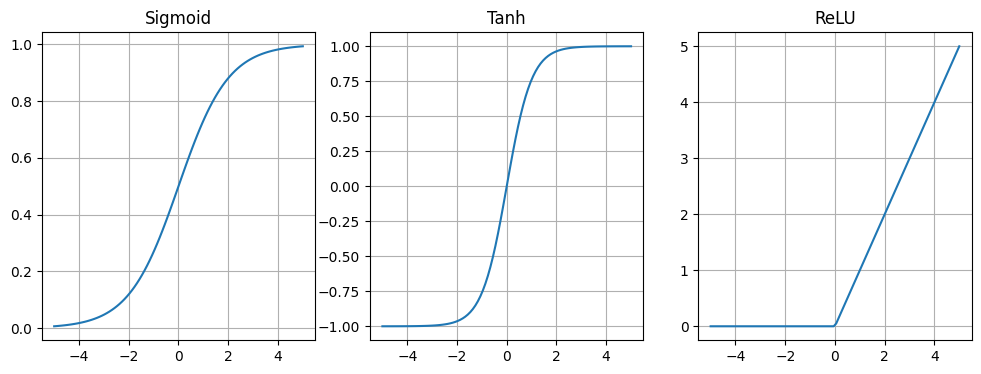

In [1]:
# 💻 Code Example: Visualizing Activation Functions
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Create input data
x = np.linspace(-5, 5, 100)

# Plot the functions
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(x, tanh(x))
plt.title('Tanh')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(x, relu(x))
plt.title('ReLU')
plt.grid(True)

plt.show()

### 🧠 Practice Task 2

In the code cell below, write a simple Python function called `my_relu` that takes a number `x` as input. If `x` is positive, it should return `x`. If `x` is negative, it should return 0.

In [2]:
# Write your my_relu function here
def my_relu(x):
    # Your code here
    if x > 0:
        return x
    else:
        return 0

# Test your function
print(f"ReLU of 5 is {my_relu(5)}")
print(f"ReLU of -3 is {my_relu(-3)}")

ReLU of 5 is 5
ReLU of -3 is 0


--- 
## Topic 3: Cross-Entropy Loss

📄 **Explanation:**
A **loss function** is like a grading system for our model. It tells us how far off our model's prediction was from the true answer. The goal of training is to make the loss as small as possible.

For classification problems (like deciding if a picture is a 'cat', 'dog', or 'bird'), we often use **Cross-Entropy Loss**. It's very effective because it gives a much higher penalty for predictions that are very wrong and very confident. 

- **Binary Cross-Entropy**: Used for two-class problems (e.g., yes/no).
- **Categorical Cross-Entropy**: Used for multi-class problems (e.g., cat/dog/bird).

In [3]:
# 💻 Code Example: Calculating Loss
import numpy as np

def binary_cross_entropy(y_true, y_pred):
    """Calculates binary cross-entropy for a single example."""
    # To avoid log(0) error, we clip the prediction value
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Scenario 1: Good prediction
# The true answer is 1 (e.g., 'is a cat')
# The model predicts 0.9 (90% sure it's a cat)
loss1 = binary_cross_entropy(y_true=1, y_pred=0.9)
print(f"Loss for a good prediction (predicts 0.9 when answer is 1): {loss1:.4f}")

# Scenario 2: Bad prediction
# The true answer is 1
# The model predicts 0.1 (10% sure it's a cat, so 90% sure it's NOT a cat)
loss2 = binary_cross_entropy(y_true=1, y_pred=0.1)
print(f"Loss for a bad prediction (predicts 0.1 when answer is 1): {loss2:.4f}")

print("\n💡 Notice how the loss is much higher for the bad prediction! This large loss value will cause a bigger update during the backward pass.")

Loss for a good prediction (predicts 0.9 when answer is 1): 0.1054
Loss for a bad prediction (predicts 0.1 when answer is 1): 2.3026

💡 Notice how the loss is much higher for the bad prediction! This large loss value will cause a bigger update during the backward pass.


### 🧠 Practice Task 3

Imagine the true label `y_true` is `0` (e.g., 'not a cat'). What would the loss be if the model predicts `y_pred = 0.99`? Is this a good or bad prediction? Use the code cell above to calculate it.

--- 
## Topic 4: Computational Graphs and Backpropagation

📄 **Explanation:**
So how does a framework like TensorFlow or PyTorch actually *do* the backward pass? The answer is **Backpropagation** on a **Computational Graph**.

Think of a computational graph as a flowchart for all the math operations in the forward pass. Each node is a simple operation (like addition or multiplication). 

Backpropagation is an algorithm that cleverly moves backward through this flowchart, using the chain rule from calculus to figure out how much each weight and bias contributed to the final loss. It's an incredibly efficient way to calculate all the adjustments needed to improve the model.

💡 **The good news:** As developers, we almost never have to implement this ourselves! Modern libraries handle it all automatically when we call `model.fit()`.

In [4]:
# 💻 Code Example: Building a Model in Keras (TensorFlow)
# This simple code abstracts away all the complexity of backpropagation.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential([
    # Input layer shape is defined here for 784 features (e.g., a 28x28 image)
    Dense(10, activation='relu', input_shape=(784,)),  # Hidden layer with 10 neurons and ReLU activation
    Dense(10, activation='relu'),                     # Another hidden layer
    Dense(10, activation='softmax')                   # Output layer with 10 neurons (for 10 classes) and softmax
])

# Compile the model
# This step prepares the model for training by defining the optimizer (how to update weights),
# the loss function (what to minimize), and metrics (what to track).
model.compile(optimizer='adam',                  # Adam is a popular and effective optimizer
              loss='categorical_crossentropy', # Our loss function for multi-class problems
              metrics=['accuracy'])          # We want to see the accuracy during training

# Print the model summary
# The 'magic' of backpropagation happens when you call model.fit() on your data.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 💻 Code Example: Building and Training a Simple Model in Keras (TensorFlow)
# This simple code trains a small neural network on the MNIST digits dataset.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# -----------------------------
# 1️⃣ Load a simple dataset (MNIST handwritten digits)
# -----------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the 28x28 images into 784-dimensional vectors
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0

# One-hot encode the labels (0–9 digits)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -----------------------------
# 2️⃣ Define the model architecture
# -----------------------------
model = Sequential([
    Dense(10, activation='relu', input_shape=(784,)),  # Hidden layer with 10 neurons
    Dense(10, activation='relu'),                      # Another hidden layer
    Dense(10, activation='softmax')                    # Output layer (10 classes)
])

# -----------------------------
# 3️⃣ Compile the model
# -----------------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# 4️⃣ Train the model
# -----------------------------
# The 'magic' of backpropagation happens here!
history = model.fit(X_train, y_train,
                    epochs=5,               # small number of epochs for beginners
                    batch_size=32,
                    validation_split=0.1,   # 10% of training data used for validation
                    verbose=1)

# -----------------------------
# 5️⃣ Evaluate on test data
# -----------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


Epoch 1/5
1688/1688 [==============================] - 5s 2ms/step - loss: 0.6546 - accuracy: 0.7978 - val_loss: 0.2881 - val_accuracy: 0.9187
Epoch 2/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3083 - accuracy: 0.9094 - val_loss: 0.2297 - val_accuracy: 0.9335
Epoch 3/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2640 - accuracy: 0.9231 - val_loss: 0.2131 - val_accuracy: 0.9415
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2429 - accuracy: 0.9281 - val_loss: 0.2025 - val_accuracy: 0.9448
Epoch 5/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2294 - accuracy: 0.9328 - val_loss: 0.1881 - val_accuracy: 0.9462

✅ Test Accuracy: 0.9340


### 🧠 Practice Task 4

Modify the Keras model in the code cell above. Change the first hidden layer from having 10 neurons to having **32** neurons. Then, re-run the cell to see the new model summary. Notice how the number of 'Total params' (parameters) changes!

--- 
## Topic 5: Vanishing and Exploding Gradients

📄 **Explanation:**
During backpropagation in very deep networks (networks with many layers), the error signals that are passed backward can sometimes run into problems:

- **Vanishing Gradients:** The error signal becomes incredibly small as it travels back. The early layers of the network get almost no update signal, so they stop learning. Imagine a message whispered down a very long line of people—by the end, it's just gibberish or gone completely.

- **Exploding Gradients:** The opposite happens. The error signal gets bigger and bigger, leading to huge, unstable updates to the weights. The model's training becomes chaotic and never finds a good solution.

💡 **Modern Solutions:** This used to be a huge problem, but now we have great solutions! Using the **ReLU activation function** is a major one, as it helps keep the gradient signal strong. Other techniques like proper weight initialization and batch normalization also help prevent these issues.

### 🧠 Practice Task 5

Based on the explanation, look at our Keras model from the previous topic. Which specific part of this line of code helps prevent the vanishing gradient problem?

`Dense(10, activation='relu', input_shape=(784,))`

*(Hint: It's a keyword argument we've discussed!)*

--- 
## Topic 6: Overfitting, Underfitting, and Dropout Regularization

📄 **Explanation:**
When training a model, we want it to find a perfect balance.

- **Underfitting:** The model is too simple and doesn't learn the patterns in the data. It performs poorly on both the training data and new test data. (Like not studying for a test at all).
- **Overfitting:** The model is too complex and learns the training data *too well*—it memorizes the examples, including the noise. It gets an A+ on the training data but fails miserably on new test data it hasn't seen before. (Like memorizing the answers to a practice test but not understanding the concepts).

**Dropout Regularization** is a clever technique to fight overfitting. During each training step, it randomly turns off (or 'drops') a fraction of the neurons. This forces the other neurons to learn more robustly and not rely on any single neuron to make predictions. It's like training a sports team where players are randomly benched, forcing everyone else to learn to work together better.

In [5]:
# 💻 Code Example: Adding Dropout to a Keras Model

from tensorflow.keras.layers import Dropout

# Define a model with Dropout layers
model_with_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),  # Drops 20% of neurons from the previous layer during training
    
    Dense(64, activation='relu'),
    Dropout(0.2),  # Another dropout layer
    
    Dense(10, activation='softmax')
])

model_with_dropout.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

model_with_dropout.summary()

print("\n✅ This model is now more resistant to overfitting!")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________

✅ This model is now more resistant to overfitti

### 🧠 Practice Task 6

Copy the code from the cell above and modify it. Change the first dropout rate from `0.2` to `0.5`. This means it will randomly drop 50% of the neurons from the first hidden layer during training! Then, run the summary to see your new model.

--- 
# 🚀 Final Revision Assignment

Congratulations on making it through the core concepts! Now it's time to put your knowledge to the test. These tasks are designed to help you revise everything we've covered.

### Task 1: Multiple Choice Question (MCQ)

What is the primary purpose of an activation function in a neural network?

a) To speed up the training process.
b) To introduce non-linearity, allowing the network to learn complex patterns.
c) To normalize the input data.
d) To reduce the number of parameters in the model.

### Task 2: Short Question

In your own words, explain the difference between overfitting and underfitting. What are the signs of each? (e.g., how would training accuracy vs. testing accuracy look?)

### Task 3: Problem-Solving Calculation

Given an input `x = [0.5, 0.8]`, `weights = [0.2, -0.6]`, and `bias = 0.1`, calculate the final output of a single neuron that uses a sigmoid activation function. Fill in the code below to find the answer.

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Your inputs
x = np.array([0.5, 0.8])
weights = np.array([0.2, -0.6])
bias = 0.1

# Calculate the weighted sum 'z'
z = # YOUR CODE HERE

# Calculate the final output
output = # YOUR CODE HERE

print(f"The final output is: {output}")

### Task 4: Case Study

You are tasked with building a model to classify images of handwritten digits (0-9).

a) What would be an appropriate activation function for the **output layer** of your MLP? Why? (Hint: How many classes are there?)
b) What loss function would you use?
c) If your model achieves 99% accuracy on the training set but only 85% on the test set, what problem are you likely facing, and what is one technique you could use to address it?

### Task 5: Final Coding Task

Build a complete Keras model for the handwritten digit classification task described in the Case Study. 

**Requirements:**
1. The input shape should be `(784,)`.
2. Use two hidden layers with the `relu` activation function. The first should have 64 neurons, the second 32.
3. Add a `Dropout(0.3)` layer after the first hidden layer.
4. The output layer should have the correct number of neurons and the correct activation function for classifying 10 digits (0-9).
5. Compile the model with the `'adam'` optimizer and the appropriate loss function.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build your model here based on the requirements
final_model = Sequential([
    # YOUR LAYERS HERE
])

# Compile your model
# final_model.compile(...) # UNCOMMENT AND COMPLETE THIS LINE

# Print the summary to check your work
# final_model.summary()

## 🎉 You've reached the end! 🎉

Well done! You have successfully covered the fundamental concepts of Multilayer Perceptrons. This is a huge step in your AI journey. Keep practicing and experimenting!